In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("./Data/merged.csv")

In [4]:
unique_item_codes = data['item_code'].unique()
unique_item_codes_list = unique_item_codes.tolist()
unique_item_codes_list.remove('0')
unique_item_codes_list_updated = np.array(unique_item_codes_list)
unique_item_codes

array(['0', 'TIN001', 'CHO001', 'CIN001', 'JAS001', 'FR001', 'ARI001'],
      dtype=object)

In [5]:
#Cleaning the data
data_cleaned = data[data['issue_date'] != "0"]
data_cleaned['issue_date'] = pd.to_datetime(data_cleaned['issue_date'])

/home/sachin/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/home/sachin/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sachin/anaconda3/envs/ML/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


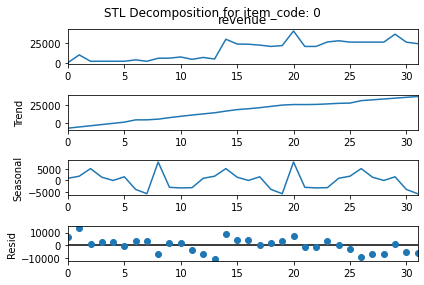

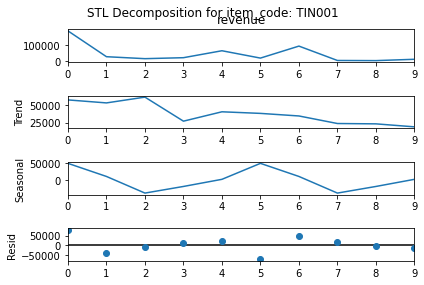

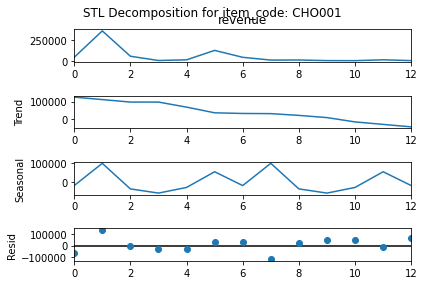

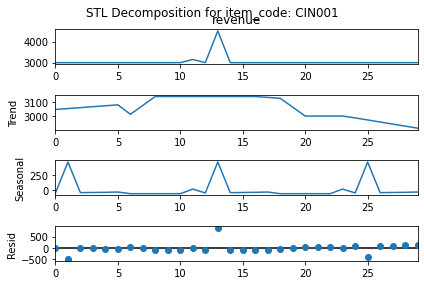

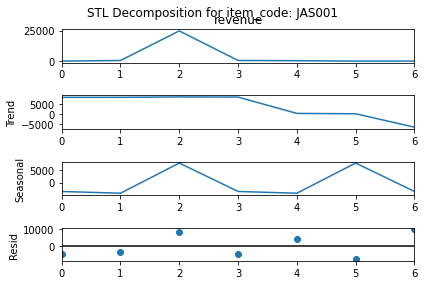

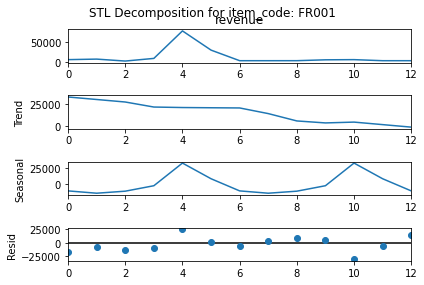

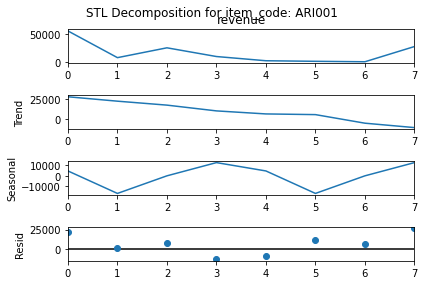

In [6]:
def adjusted_stl_decomposition_for_item(item_code, data):
    # Filter data for the given item_code
    item_data = data[data['item_code'] == item_code]
    
    # Ensure 'issue_date' column is in datetime format
    item_data['issue_date'] = pd.to_datetime(item_data['issue_date'])
    
    # Aggregate data (assuming monthly for simplicity)
    aggregated_data = item_data.groupby(item_data['issue_date'].dt.to_period("M")).agg({
        'revenue': 'sum'
    }).reset_index()
    
    # Convert period back to datetime for STL
    aggregated_data['issue_date'] = aggregated_data['issue_date'].dt.to_timestamp()
    
    # Adjust the period based on available data
    available_data_points = len(aggregated_data)
    if available_data_points < 24:
        period = available_data_points // 2
    else:
        period = 12
    
    # Perform STL decomposition
    result = sm.tsa.seasonal_decompose(aggregated_data['revenue'], model='additive', period=period, extrapolate_trend='freq')
    
    # Plot the decomposition
    result.plot()
    plt.suptitle(f'STL Decomposition for item_code: {item_code}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Perform adjusted STL decomposition for each unique item code
for item_code in unique_item_codes:
    adjusted_stl_decomposition_for_item(item_code, data_cleaned)

In [7]:
def adjusted_stl_decomposition_for_item_data(item_code, data):
    # Filter data for the given item_code
    item_data = data[data['item_code'] == item_code]
    
    # Ensure 'issue_date' column is in datetime format
    item_data['issue_date'] = pd.to_datetime(item_data['issue_date'])
    
    # Aggregate data (assuming monthly for simplicity)
    aggregated_data = item_data.groupby(item_data['issue_date'].dt.to_period("M")).agg({
        'revenue': 'sum'
    }).reset_index()
    
    # Convert period back to datetime for STL
    aggregated_data['issue_date'] = aggregated_data['issue_date'].dt.to_timestamp()
    
    # Adjust the period based on available data
    available_data_points = len(aggregated_data)
    if available_data_points < 24:
        period = available_data_points // 2
    else:
        period = 12
    
    # Perform STL decomposition
    result = sm.tsa.seasonal_decompose(aggregated_data['revenue'], model='additive', period=period, extrapolate_trend='freq')
    seasonal_revenue = result.seasonal
    
    # Prepare data for JSON
    output = {
        "item_code": item_code,
        "dates": aggregated_data['issue_date'].dt.strftime('%Y-%m-%d').tolist(),
        "observed": aggregated_data['revenue'].tolist(),
        "trend": result.trend.tolist(),
        "seasonal": result.seasonal.tolist(),
        "residual": result.resid.tolist(),
        "peak_revenue_month":seasonal_revenue.idxmax().month_name(),
        "trough_revenue_month":seasonal_revenue.idxmin().month_name()
    }
    
    return output

adjusted_stl_decomposition_for_item_data('FR001', data_cleaned)

/home/sachin/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AttributeError: 'int' object has no attribute 'month_name'